# `porosity`
Porosity is the void volume divided by the bulk volume. In a boolean image this can be calculated with ``im.sum()/im.size``, assuming the void voxels are labeled ``True``.  It can be slightly more complicated however, if the image does not fill up the full array (i.e. ``im.size`` is not the bulk volume) or if the there are other values in the image besides ``True`` (i.e. it's not obvious what is void space).  The ``porosity`` function works as ``np.sum(im == 1)/np.sum(im == 0)``. This means that any voxels marked something else are ignored.  It's still very simple, but is more robust which comes in handy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
np.random.seed(0)

In [2]:
import inspect
inspect.signature(ps.metrics.porosity)

<Signature (im)>

## `im`
In its basic form a binary image is fine:

In [3]:
im = ps.generators.blobs(shape=[200, 200])
e = ps.metrics.porosity(im)
print(e)

0.52215


However, if the image is has some unfilled space, the around a cylindrical tomogram, then it can be labelled as 2 so it's ignored:

0.49670287539936103


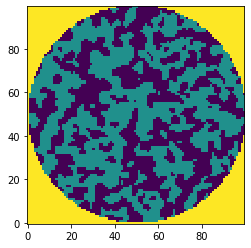

In [4]:
im = ps.generators.blobs(shape=[100, 100, 100], porosity=0.5, blobiness=2).astype(int)
cyl = ps.generators.cylindrical_plug(shape=im.shape, axis=0)
im[~cyl] = 2
plt.imshow(im[50, ...], interpolation='none', origin='lower')

e = ps.metrics.porosity(im)
print(e)

The porosity specified when generatign the blobsimage was 50%, and the computed porosity is also 50%, despite having a regions of 2's around the outside.